# Time Series Evolution of Review Sentiment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

In [3]:
# Load the data from the JSON file
with open('./datasets/review_dataset_new_orleans_sentiment.json', 'r') as f:
    data = f.readlines()
    data = list(map(lambda x: x.rstrip(), data))
    data = "[" + ','.join(data) + "]"

    # Load the data into a DataFrame
    data = pd.read_json(data)

# Display the first few rows of the DataFrame
print(data.head())

/var/folders/y1/sdj8rxp944zc_kqcq6lcl6jh0000gn/T/ipykernel_55972/2227727830.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(data)


                    review_id  sentiment                date
0  rev_Sx8TMOWLNuJBWer-0pcmoA          1 2017-01-14 20:54:15
1  rev_6AxgBCNX_PNTOxmbRSwcKQ          1 2015-01-03 23:21:18
2  rev_z0osLHDvXvzfm57D4DmD2Q          1 2016-11-22 00:22:53
3  rev_jC-fGfx-YLqxVBcyTAd4Pw          1 2013-12-29 02:37:42
4  rev_Ki90-hauSIfW_7sBuBBqfA          1 2014-06-11 14:55:14


### Plot Time Series

In [4]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
sentiment_counts = data.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

print(sentiment_counts.head())

sentiment    0     1
year                
2005        25   266
2006        13   285
2007        41  1192
2008        91  3101
2009       168  6553


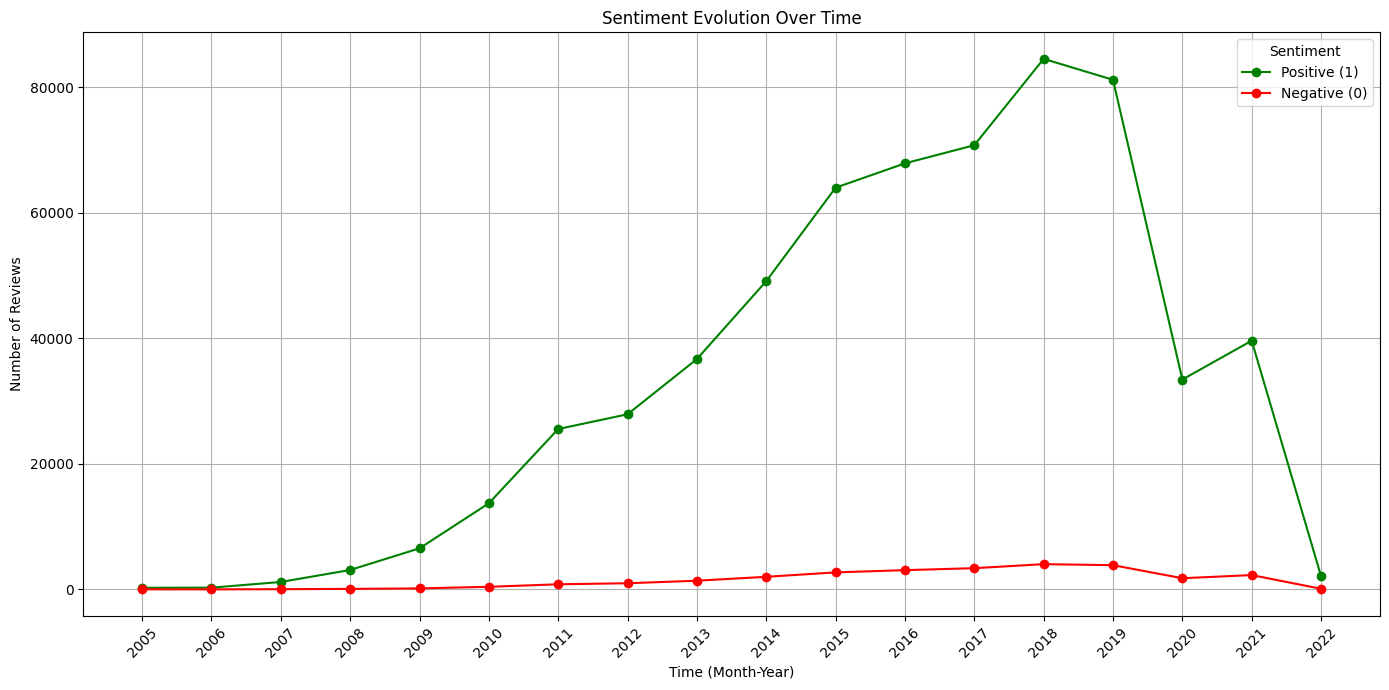

In [5]:
sentiment_counts = sentiment_counts.reset_index()
sentiment_counts['year'] = sentiment_counts['year'].astype(str)

# Plot the sentiment trends over time using a line plot
plt.figure(figsize=(14, 7))
plt.plot(sentiment_counts['year'], sentiment_counts[1], label='Positive (1)', color='green', marker='o')
plt.plot(sentiment_counts['year'], sentiment_counts[0], label='Negative (0)', color='red', marker='o')
plt.title('Sentiment Evolution Over Time')
plt.xlabel('Time (Month-Year)')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

### To evaluate and analyze the trends in our sentiment data over time, we can look at several aspects:

- Trend Analysis: We can identify and describe the general trend in both positive and negative sentiments over time.
- Peaks and Troughs: We can check for any peaks and troughs in the sentiment trends and try to correlate them with significant events or changes
- Rate of Change: We can calculate the rate of change in sentiments over time to understand periods of rapid change
- Comparative Analysis: we can compare the trends of positive and negative sentiments to see if they are following similar patterns or diverging

#### Trend Analysis

From the provided graph, it's easy to describe the general trend in both positive and negative sentiments over time. 

Regarding the **positive reviews**, we can identify different stages in trends:
- Early Period (2005-2010)
    - The number of reviews is quite low and consistent, increasing steadily about 2007. As Yelp was released in 2004, the initial user base was relatively small, when compared to now, and many potential users weren't aware of the platform. Additionaly, during the beginning, fewer businesses where unware of Yelp and didn't encourage their customers to leave reviews. However, when businesses recognized the value of online reviews, the number of positive started to increase. On another point, in the mid-2000s, the Internet was still regularly growing, as this slower adoption rate likely contributed to fewer people using online platforms like Yelp.
- Growth Period (2010-2019)
    - During this period, we can see a significant increase in the number of positive reviews, reaching its peak around 2018-2019. This significant increase from 2010 to 2019 can be attributed to the platform's growing popularity and user base, the widespread adoption of smartphones and mobile apps, the influence of social media, increased Internet penetration, proactive participation by businesses, continuous improvements to the user experience on Yelp, a cultural shift towards trusting online reviews, and effective SEO practices.
- Decrease Period (2019-2022)
    - In this period of time there is a noticeable decline in the number of positive reviews. As Covid-19 hit during this period, a worldwide lockdown was set and the number of people going to businesses decreased. As a consequence, the number of reviews being left in Yelp reduced. However, as lockdown restrictions were lifted around 2021, we can see a small increase during this period. Also, due to the fact that the dataset in question didn't have many reviews from 2022 (a limitation from the dataset), we can see the decrease in the number of reviews.

Now looking at the **negative reviews**, there's an overall stability in the number of reviews. Until 2019 there was an increase in the amount of reviews, as expected due to the reasons stated above (Yelp's growing popularity, growing user base, adoption of online reviews, etc.). Also, due to Covid-19 in 2020, there was also an expected decrease in the number of reviews.

With all of this in mind, we may conclude that the number of positive ratings much outnumbers the number of bad reviews for the entire period in question. The key factors that supported this occurrence were human nature, business incentives, psychological biases, feedback mechanisms, social influences, sample bias, and platform dynamics. People prefer to share pleasant experiences, and businesses actively encourage satisfied consumers to provide positive feedback. Furthermore, psychological factors such as the peak-end rule and the desire for social validation influence the incidence of positive ratings.


#### Rate of Change

Before visualizing year-over-year sentiment changes, we need to smooth the data, in order to view the data in the most clear way possible. Regarding this concept, smoothing the Data consists of using a rolling average (moving average that calculates the average of a window of data points over a specified period), so that we can smooth out (technique to reduce noise and highlight longer-term trends in data) short-term fluctuations and highlight longer-term trends.

After this step, we can use line graph and bar plots to better visualize the sentiment changes.


#### Rate of Change

To visualize year-over-year sentiment changes, we can use bar plots for both positive and negative sentiment changes, with the main objetive of finding trends for both types of reviews

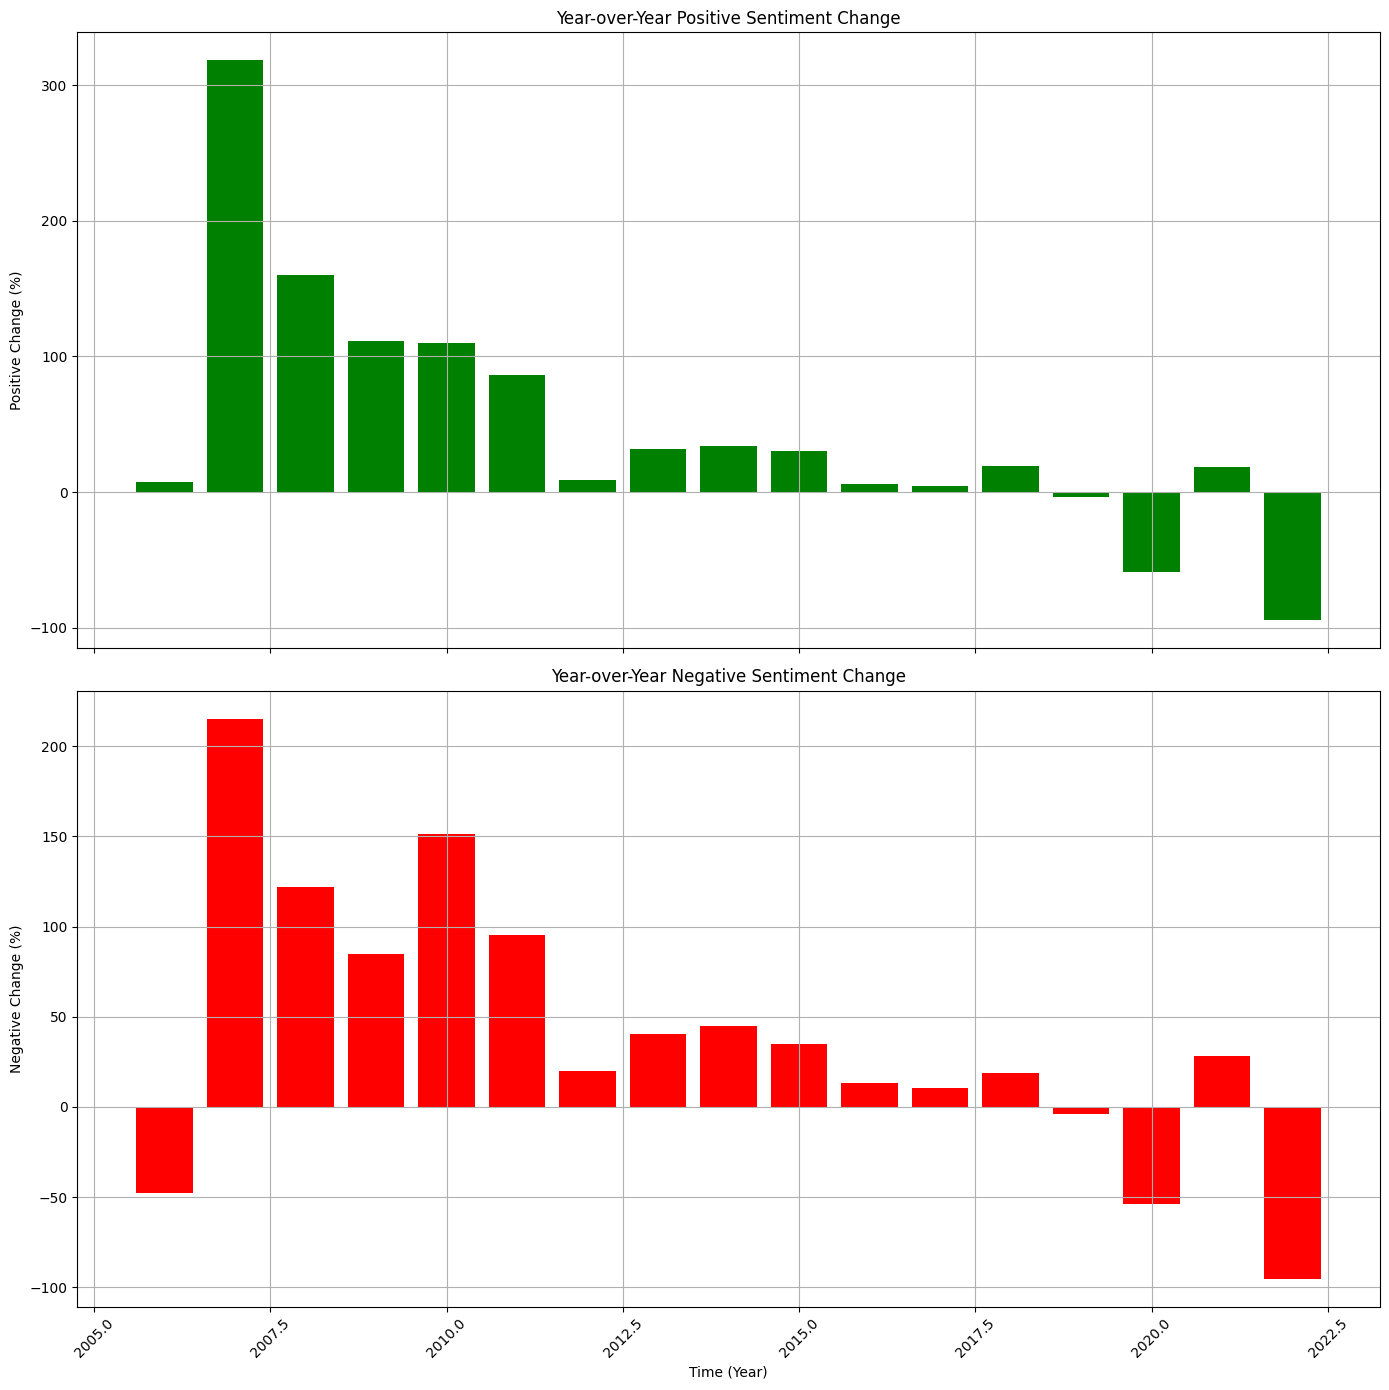

In [6]:
# Create positive and negative sentiment columns 
data['positive'] = np.where(data['sentiment'] == 1, 1, 0)
data['negative'] = np.where(data['sentiment'] == 0, 1, 0)

yearly_data = data.groupby('year').agg({'positive': 'sum', 'negative': 'sum'}).reset_index()
yearly_data['positive_change'] = yearly_data['positive'].pct_change() * 100
yearly_data['negative_change'] = yearly_data['negative'].pct_change() * 100

fig, ax = plt.subplots(2, 1, figsize=(14, 14), sharex=True)

ax[0].bar(yearly_data['year'], yearly_data['positive_change'], color='green')
ax[0].set_title('Year-over-Year Positive Sentiment Change')
ax[0].set_ylabel('Positive Change (%)')
ax[0].grid(True)

ax[1].bar(yearly_data['year'], yearly_data['negative_change'], color='red')
ax[1].set_title('Year-over-Year Negative Sentiment Change')
ax[1].set_xlabel('Time (Year)')
ax[1].set_ylabel('Negative Change (%)')
ax[1].grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the positive sentiment change bar plot, we can identify the following intervals of time:
- Early Years (2005-2010):
    - 2005-2007: Relatively low positive changes, indicating a steady growth phase.
    - 2008: A spike to over 300%, representing a significant increase in positive reviews, likely due to increased platform adoption and user engagement.
    - 2009: Continued high positive change around 160-170%, showing sustained growth.

- Stabilization (2010-2019):
    - 2010-2014: Positive changes begin to stabilize, indicating a maturing platform with consistent user engagement.
    - 2016-2019: Minor fluctuations with small increases and decreases, suggesting stable but no longer rapid growth.

- Final Decline (2019-2022)
    - 2019-2020: Decline of positive changes, especially in 2020, most likely due to the Covid-19 pandemic
    - 2021: Minor increase of positive changes. This could be justified by the lift of the Covid-19 restrictions
    - 2022: Major decline in changes, most probably due to the lack of data.

-----//-----

Regarding the negative sentiment change bar plot, we can also identify similar intervals of time:
- Early Years (2005-2010):
    - 2006-2008: Significant negative changes, indicating a substantial increase in negative reviews. This could be due to early growing pains and users becoming more comfortable leaving critical feedback.
    - 2009-2010: High negative changes continue, aligning with the peak positive changes, suggesting increased overall review activity.

- Stabilization and Decline (2010-2022):
    - 2011-2019: Negative changes stabilize, with fewer extreme fluctuations, indicating a balanced platform where users are consistently leaving feedback.
    - 2020-2022: A sharp negative change, mirroring the positive sentiment decline, likely due to the pandemic's impact on businesses and customer dissatisfaction.

Overall, the data show that, while Yelp grew rapidly in its early years, the platform has matured to the point that user evaluations are more steady, with external variables such as the pandemic having a significant impact on current sentiment changes. This investigation emphasizes the significance of knowing the dynamics of customer feedback and the impact of external events on user behavior in digital platforms.

#### Peaks and Troughs

In terms of Peaks, they represent periods where, in this case, the number of reviews reached a high point, which indicates the periods of users were highly engaged in the platform. On the contrary, Troughs indicate periods of time reviews, whether they're positive or negative, decreased. 

Each of these concepts can be a consequence of various types of factors and events (for example, the Covid-19 pandemic).

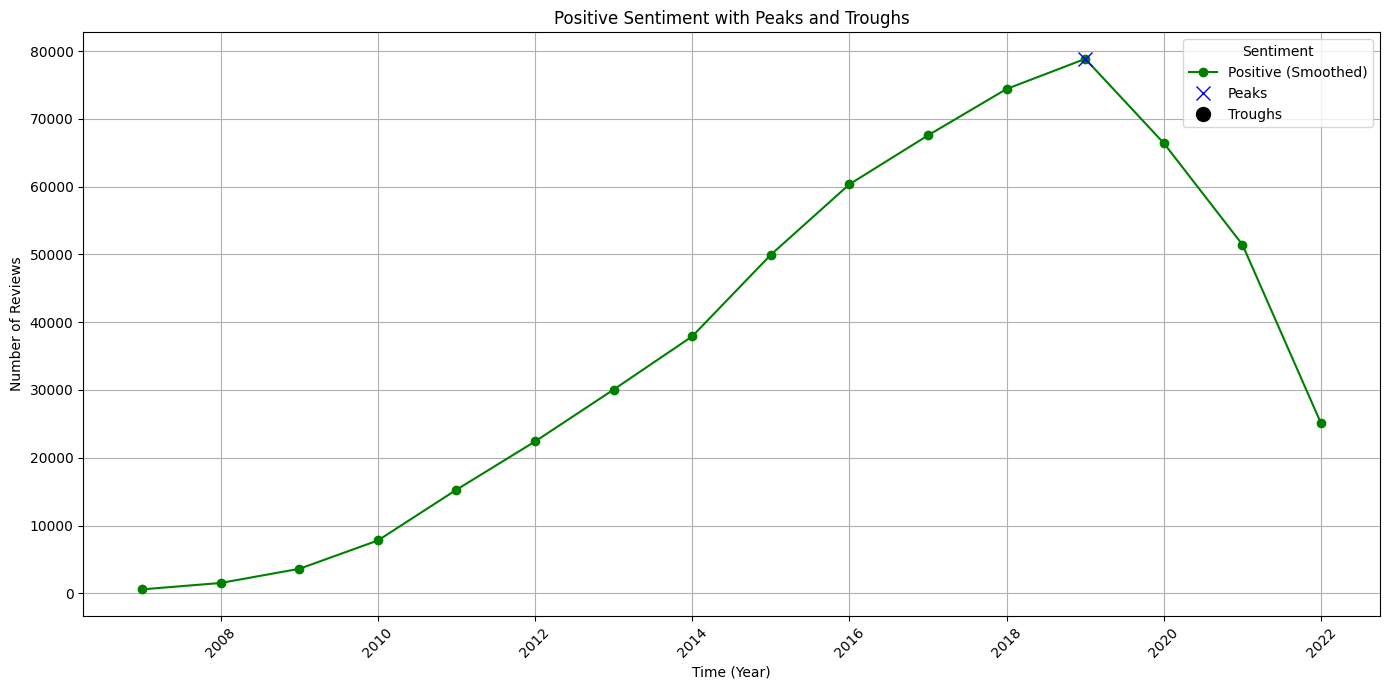

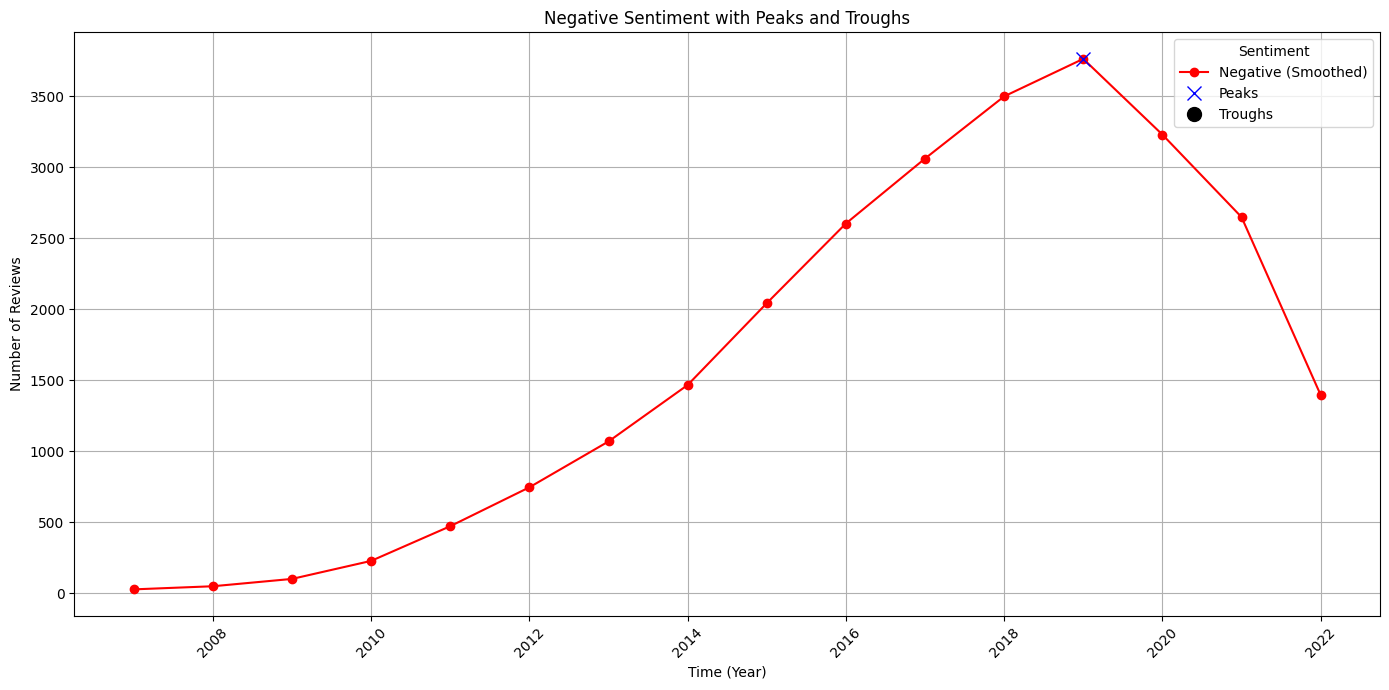

In [7]:
from scipy.signal import find_peaks

# Assuming data is already loaded and preprocessed
data['year'] = pd.to_datetime(data['date'], unit='ms').dt.year

# Calculate yearly sum of positive and negative reviews
yearly_data = data.groupby('year').agg({'positive': 'sum', 'negative': 'sum'}).reset_index()

# Apply rolling average to smooth the data
window_size = 3
yearly_data['positive_smoothed'] = yearly_data['positive'].rolling(window=window_size).mean()
yearly_data['negative_smoothed'] = yearly_data['negative'].rolling(window=window_size).mean()

# Find peaks and troughs in the smoothed positive sentiment
positive_peaks, _ = find_peaks(yearly_data['positive_smoothed'])
positive_troughs, _ = find_peaks(-yearly_data['positive_smoothed'])

# Find peaks and troughs in the smoothed negative sentiment
negative_peaks, _ = find_peaks(yearly_data['negative_smoothed'])
negative_troughs, _ = find_peaks(-yearly_data['negative_smoothed'])

# Plot the smoothed positive sentiment with peaks and troughs
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['year'], yearly_data['positive_smoothed'], label='Positive (Smoothed)', color='green', marker='o')
plt.plot(yearly_data['year'].iloc[positive_peaks], yearly_data['positive_smoothed'].iloc[positive_peaks], "x", label='Peaks', color='blue', markersize=10)
plt.plot(yearly_data['year'].iloc[positive_troughs], yearly_data['positive_smoothed'].iloc[positive_troughs], "o", label='Troughs', color='black', markersize=10)
plt.title('Positive Sentiment with Peaks and Troughs')
plt.xlabel('Time (Year)')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot the smoothed negative sentiment with peaks and troughs
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['year'], yearly_data['negative_smoothed'], label='Negative (Smoothed)', color='red', marker='o')
plt.plot(yearly_data['year'].iloc[negative_peaks], yearly_data['negative_smoothed'].iloc[negative_peaks], "x", label='Peaks', color='blue', markersize=10)
plt.plot(yearly_data['year'].iloc[negative_troughs], yearly_data['negative_smoothed'].iloc[negative_troughs], "o", label='Troughs', color='black', markersize=10)
plt.title('Negative Sentiment with Peaks and Troughs')
plt.xlabel('Time (Year)')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


These graphs shows a clear pattern of initial rapid growth in both positive and negative sentiments on Yelp, peaking in 2019, followed by a significant decline post-2019. This decline is particularly pronounced around the COVID-19 pandemic period, highlighting the impact of external factors on customer feedback. The peaks and troughs provide valuable insights into the dynamics of user engagement and sentiment over time, reflecting the influence of platform growth, technological advancements, business practices, and external events.

#### Comparative Analysis

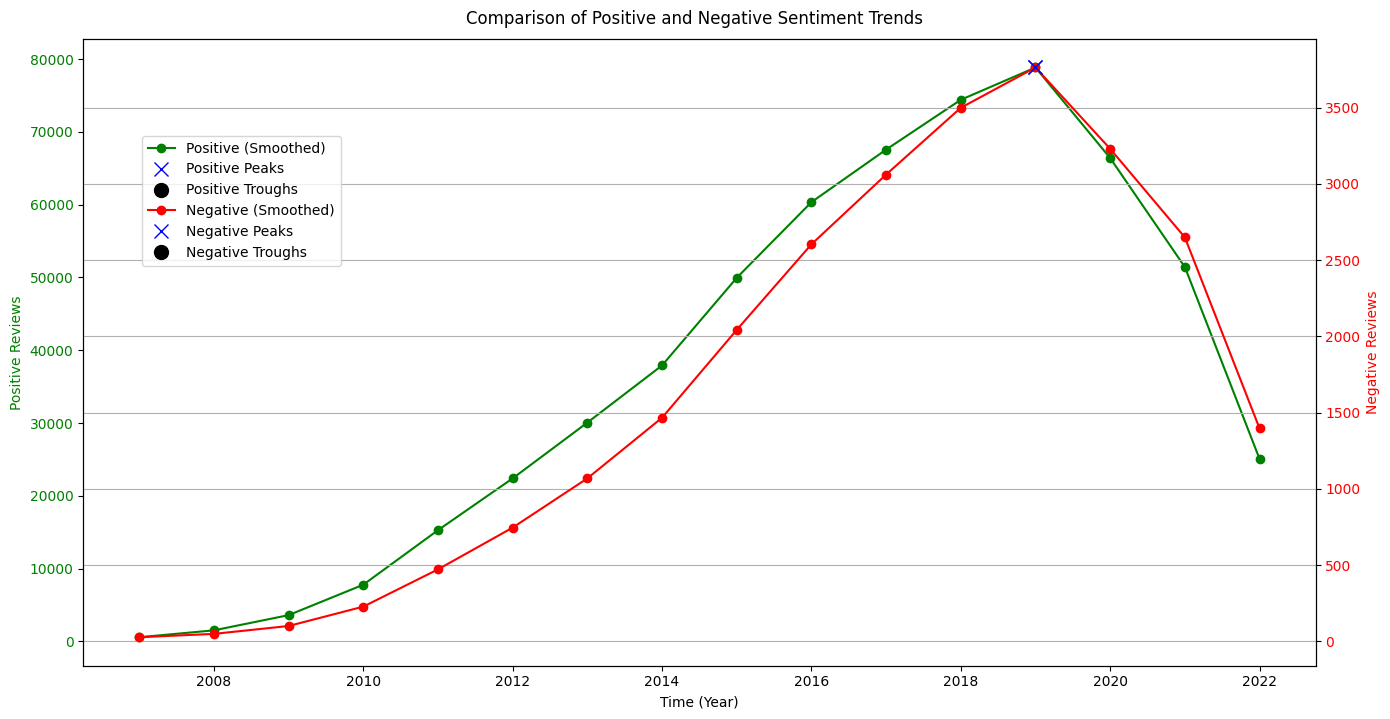

In [8]:
yearly_data = data.groupby('year').agg({'positive': 'sum', 'negative': 'sum'}).reset_index()

# Apply rolling average to smooth the data
window_size = 3
yearly_data['positive_smoothed'] = yearly_data['positive'].rolling(window=window_size).mean()
yearly_data['negative_smoothed'] = yearly_data['negative'].rolling(window=window_size).mean()

# Find peaks and troughs in the smoothed positive and negative sentiment
positive_peaks, _ = find_peaks(yearly_data['positive_smoothed'])
positive_troughs, _ = find_peaks(-yearly_data['positive_smoothed'])
negative_peaks, _ = find_peaks(yearly_data['negative_smoothed'])
negative_troughs, _ = find_peaks(-yearly_data['negative_smoothed'])

# Plot the smoothed positive and negative sentiment with peaks and troughs
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Time (Year)')
ax1.set_ylabel('Positive Reviews', color='green')
ax1.plot(yearly_data['year'], yearly_data['positive_smoothed'], label='Positive (Smoothed)', color='green', marker='o')
ax1.plot(yearly_data['year'].iloc[positive_peaks], yearly_data['positive_smoothed'].iloc[positive_peaks], "x", label='Positive Peaks', color='blue', markersize=10)
ax1.plot(yearly_data['year'].iloc[positive_troughs], yearly_data['positive_smoothed'].iloc[positive_troughs], "o", label='Positive Troughs', color='black', markersize=10)
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis
ax2.set_ylabel('Negative Reviews', color='red')  # we already handled the x-label with ax1
ax2.plot(yearly_data['year'], yearly_data['negative_smoothed'], label='Negative (Smoothed)', color='red', marker='o')
ax2.plot(yearly_data['year'].iloc[negative_peaks], yearly_data['negative_smoothed'].iloc[negative_peaks], "x", label='Negative Peaks', color='blue', markersize=10)
ax2.plot(yearly_data['year'].iloc[negative_troughs], yearly_data['negative_smoothed'].iloc[negative_troughs], "o", label='Negative Troughs', color='black', markersize=10)
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.suptitle('Comparison of Positive and Negative Sentiment Trends', y=1.02)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.85))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In this graph we can get a better understanding of the trends in both positive and negative sentiment trends. As we have previously stated, both types of sentiments share similar trend patterns, having its peak in 2019.

### To further analyze and forecast the sentiment time series data, we can apply various time series analysis techniques. These techniques include:

**Exploratory Data Analysis (EDA)**

With this we can:
- Identify and describe the patterns: trend, seasonality, and cycles.
- Check for stationarity.
- Visualize autocorrelation and partial autocorrelation.

**Transformations and Adjustments**

We can do the following tasks:
- Apply transformations to stabilize the variance (e.g., log transformation, differencing).
- Decompose the time series to separate trend, seasonality, and residuals.

**Forecasting Models and respective Model Evaluation**

This includes:
- Baseline methods (mean, naive).
- Exponential Smoothing (Simple, Holt’s, Holt-Winters).
- ARIMA (AutoRegressive Integrated Moving Average) and Seasonal ARIMA.
- Evaluate the models by splitting the data into training and test sets, evaluating using metrics like MAE, MSE, RMSE, MAPE, and MASE and checking residual diagnostics to ensure model assumptions are met

#### Exploratory Data Analysis (EDA)

- **Stationarity**

A stationary time series is one whose statistical properties do not depend on the time at which the series is observed. 

- Why is stationarity important?

When we want to predict the future using past data, we want the patterns to be consistent. If the patterns change too much, our predictions won't be reliable. That's why many prediction methods assume that the data patterns stay the same over time.

- How to check if data is stationary?

We can use the **ADF Test**. The Augmented Dickey-Fuller (ADF) test is a statistical test that checks if the data is stationary or not. It tells us if the patterns in your data stay consistent over time, by giving us a ADF statistic and a p-value:
- ADF Statistic: A big negative number suggests the data is stationary
- p-value: A small number (usually less than 0.05) also suggests that the data is stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller

# Calculate yearly sum of positive and negative reviews
yearly_data = data.groupby('year').agg({'positive': 'sum', 'negative': 'sum'}).reset_index()

# Apply rolling average to smooth the data
window_size = 3
yearly_data['positive_smoothed'] = yearly_data['positive'].rolling(window=window_size).mean()
yearly_data['negative_smoothed'] = yearly_data['negative'].rolling(window=window_size).mean()

# Perform the Augmented Dickey-Fuller test
adf_result_positive = adfuller(yearly_data['positive_smoothed'].dropna())
adf_result_negative = adfuller(yearly_data['negative_smoothed'].dropna())

# Print ADF test results for positive sentiment
print('ADF Statistic for Positive Sentiment:', adf_result_positive[0])
print('p-value:', adf_result_positive[1])
print('Critical Values:', adf_result_positive[4])

# Print ADF test results for negative sentiment
print('ADF Statistic for Negative Sentiment:', adf_result_negative[0])
print('p-value:', adf_result_negative[1])
print('Critical Values:', adf_result_negative[4])

print("\n========================================\n")

# Interpretation of ADF test results
if adf_result_positive[1] < 0.05:
    print("The positive sentiment series is stationary.")
else:
    print("The positive sentiment series is not stationary.")

if adf_result_negative[1] < 0.05:
    print("The negative sentiment series is stationary.")
else:
    print("The negative sentiment series is not stationary.")

ADF Statistic for Positive Sentiment: -18.75583626185719
p-value: 2.0270016471837424e-30
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}
ADF Statistic for Negative Sentiment: -40.194453212094466
p-value: 0.0
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}


The positive sentiment series is stationary.
The negative sentiment series is stationary.


Now that we know both the positive and negative sentiment time series are stationary, we can now move forward to the next steps:

- **Time Series Decomposition** - Break down the time series into 3 main components: trend, seasonality, and residuals. This helps to grasp the data's underlying trends.
- **Model Application** - For forecasting, we're going to use two different models: ARIMA and Exponential Smoothing
- **Model Fitting and Validation**
- **Forecasting**
- **Analysis and Interpretation**

#### Time Series Decomposition

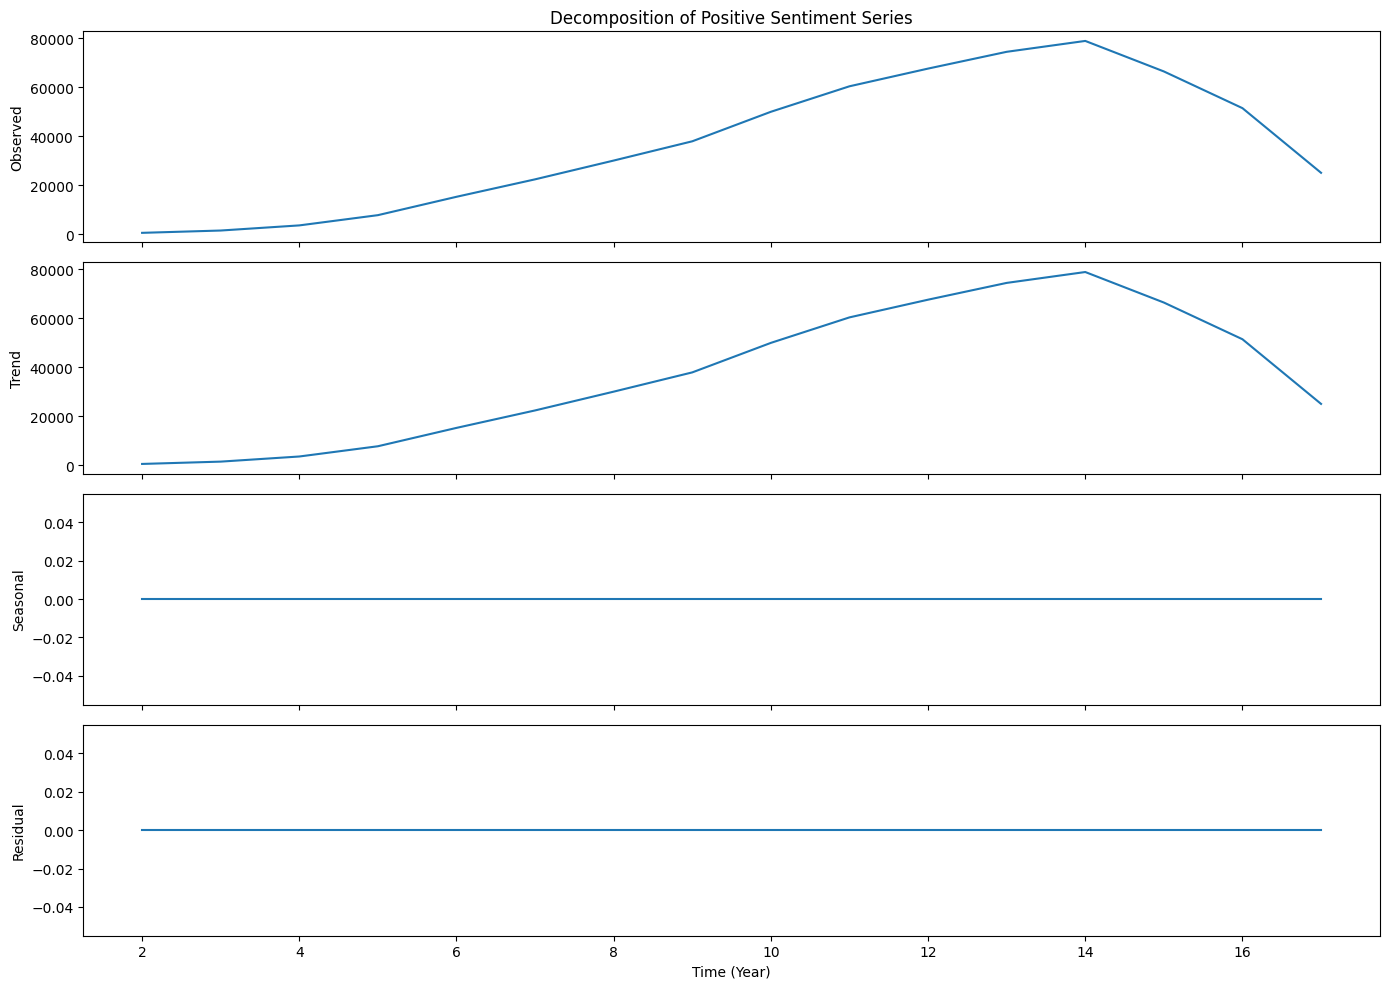

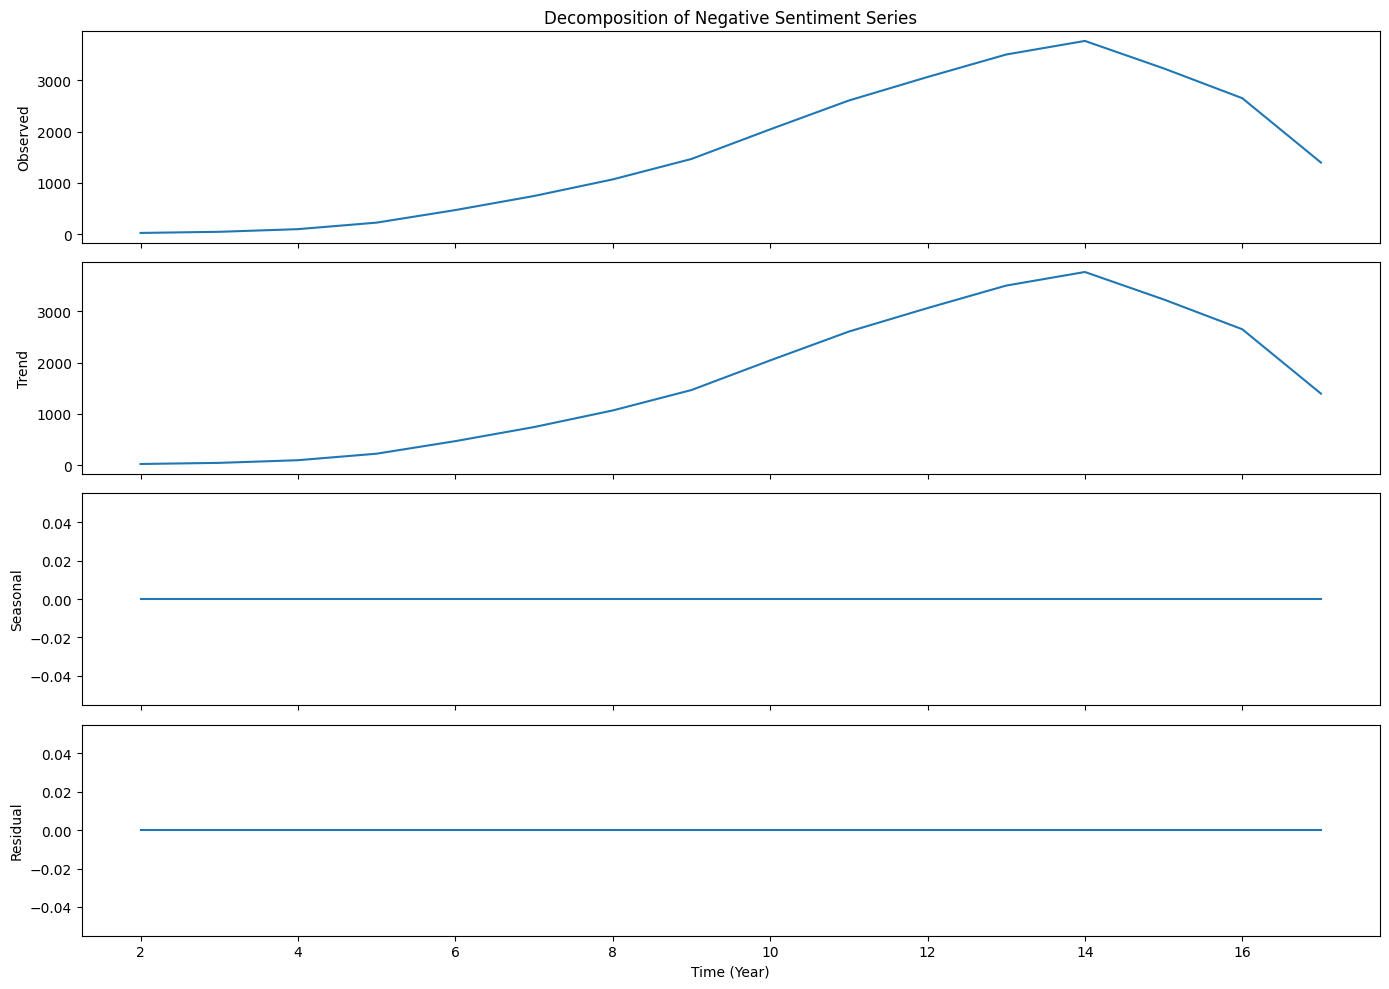

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the positive sentiment series
positive_decomposition = seasonal_decompose(yearly_data['positive_smoothed'].dropna(), model='additive', period=1)
negative_decomposition = seasonal_decompose(yearly_data['negative_smoothed'].dropna(), model='additive', period=1)

# Plot the decomposition for positive sentiment
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
ax1.plot(positive_decomposition.observed)
ax1.set_ylabel('Observed')
ax1.set_title('Decomposition of Positive Sentiment Series')

ax2.plot(positive_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(positive_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(positive_decomposition.resid)
ax4.set_ylabel('Residual')
ax4.set_xlabel('Time (Year)')

plt.tight_layout()
plt.show()

# Plot the decomposition for negative sentiment
fig, (ax5, ax6, ax7, ax8) = plt.subplots(4, 1, figsize=(14, 10), sharex=True)
ax5.plot(negative_decomposition.observed)
ax5.set_ylabel('Observed')
ax5.set_title('Decomposition of Negative Sentiment Series')

ax6.plot(negative_decomposition.trend)
ax6.set_ylabel('Trend')

ax7.plot(negative_decomposition.seasonal)
ax7.set_ylabel('Seasonal')

ax8.plot(negative_decomposition.resid)
ax8.set_ylabel('Residual')
ax8.set_xlabel('Time (Year)')

plt.tight_layout()
plt.show()


The decomposition plot breaks down the time series into its constituent components: 
- **Observed** (original smoothed positive sentiment series) 
- **Trend** (represents the long-term progression of the time series, excluding short-term fluctuations and seasonal effects)
- **Seasonal** (captures the repeating short-term cycle in the series. It shows any regular pattern that repeats over a specific period)
- **Residual** (captures the random fluctuations in the series after removing the trend and seasonal components)

-----//-----

In this case, we can see the following:
- **Observed and Trend:** In both types of sentiments, it's easy to see that the observed and trend lines show a clear upward trend until around 2019, followed by a decline. This reflects the overall growth and subsequent decrease in both positive and negative reviews over the period analyzed.
- **Seasonal Component:** The flat line at zero indicates no significant seasonal patterns in the positive and negative sentiment data. This means the changes in sentiment are not influenced by seasonal effects.
- **Residual Component:** The flat line at zero indicates that there is minimal noise or random fluctuation in the series. The variations are primarily explained by the trend.

These conclusions were already taken from the previous graphs.

#### ARIMA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

                               SARIMAX Results                                
Dep. Variable:      positive_smoothed   No. Observations:                   16
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -167.745
Date:                Sat, 18 May 2024   AIC                            343.490
Time:                        15:09:58   BIC                            346.581
Sample:                             0   HQIC                           343.649
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.696e+04   1.92e+04      1.926      0.054    -650.459    7.46e+04
ar.L1          0.8911      0.176      5.055      0.000       0.546       1.237
ma.L1          0.6859      0.544      1.261      0.2

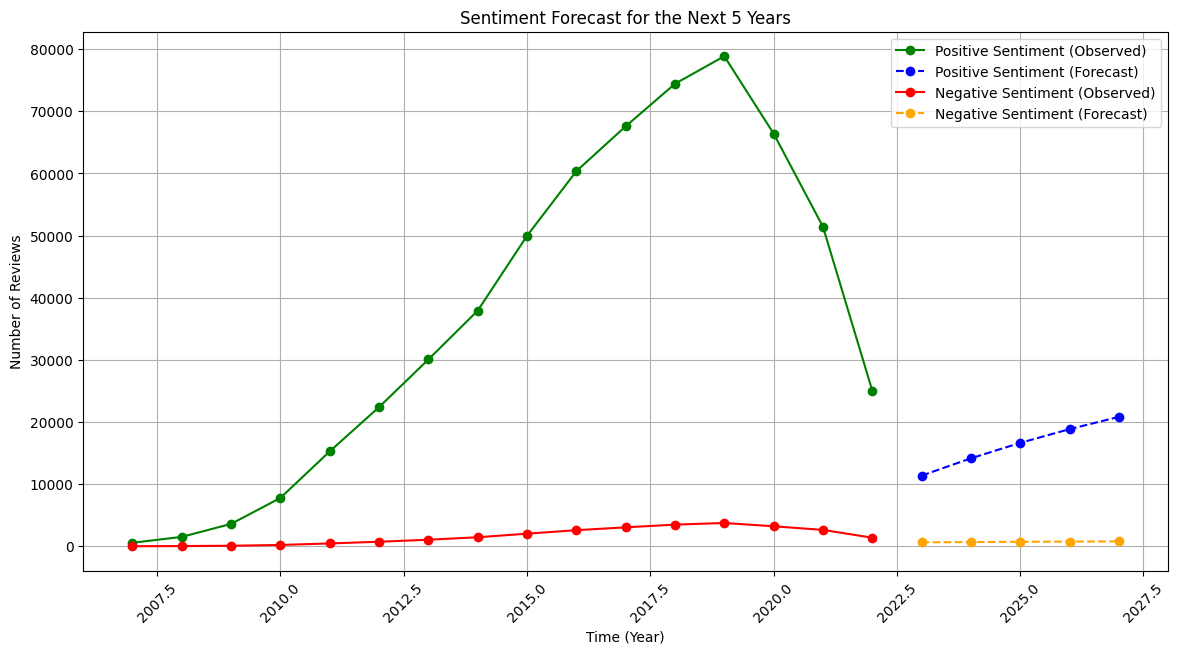

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for positive sentiment
positive_model = ARIMA(yearly_data['positive_smoothed'].dropna(), order=(1, 0, 1)).fit()
print(positive_model.summary())

# Fit ARIMA model for negative sentiment
negative_model = ARIMA(yearly_data['negative_smoothed'].dropna(), order=(1, 0, 1)).fit()
print(negative_model.summary())

# Forecast for the next 5 years for positive sentiment
positive_forecast = positive_model.forecast(steps=5)
print('Positive Sentiment Forecast:', positive_forecast)

# Forecast for the next 5 years for negative sentiment
negative_forecast = negative_model.forecast(steps=5)
print('Negative Sentiment Forecast:', negative_forecast)

# Extend the yearly data to include forecasted years
forecast_years = list(range(yearly_data['year'].max() + 1, yearly_data['year'].max() + 6))
forecast_index = pd.concat([yearly_data['year'], pd.Series(forecast_years)], ignore_index=True)

# Append the forecast to the data
positive_forecast_series = pd.Series(positive_forecast, index=forecast_years)
negative_forecast_series = pd.Series(negative_forecast, index=forecast_years)

# Concatenate the original data with the forecast
positive_extended = pd.concat([yearly_data['positive_smoothed'], positive_forecast_series])
negative_extended = pd.concat([yearly_data['negative_smoothed'], negative_forecast_series])

# Plot the forecasts
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['year'], yearly_data['positive_smoothed'], label='Positive Sentiment (Observed)', color='green', marker='o')
plt.plot(forecast_years, positive_forecast, label='Positive Sentiment (Forecast)', color='blue', linestyle='dashed', marker='o')
plt.plot(yearly_data['year'], yearly_data['negative_smoothed'], label='Negative Sentiment (Observed)', color='red', marker='o')
plt.plot(forecast_years, negative_forecast, label='Negative Sentiment (Forecast)', color='orange', linestyle='dashed', marker='o')
plt.title('Sentiment Forecast for the Next 5 Years')
plt.xlabel('Time (Year)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

| **Parameter**            | **Value**            | **Description**                                                                                            |
|--------------------------|----------------------|------------------------------------------------------------------------------------------------------------|
| **const**                | 3.696e+04            | Approximately 36,960. The constant term in the model. The value is not highly significant (p-value ≈ 0.054) |
| **ar.L1**                | 0.8911               | The coefficient for the AR(1) term. Highly significant (p-value ≈ 0.000), indicating a strong relationship with the lagged value of the series |
| **ma.L1**                | 0.6859               | The coefficient for the MA(1) term. Not highly significant (p-value ≈ 0.207), suggesting the lagged error term might not be as crucial in this model |
| **sigma2**               | 6.131e+07            | The variance of the residuals (error term). The value is large, indicating the variability in the residuals |

#### Diagnostic Tests for Positive Sentiment

| **Test**                 | **Statistic**        | **Description**                                                                                            |
|--------------------------|----------------------|------------------------------------------------------------------------------------------------------------|
| **Ljung-Box (L1) (Q)**   | 2.19                 | This test checks if there is any autocorrelation in the residuals. Prob(Q): 0.14, suggesting no significant autocorrelation |
| **Jarque-Bera (JB)**     | 6.26                 | This test checks if the residuals are normally distributed. Prob(JB): 0.04, indicating some deviation from normality |
| **Heteroskedasticity (H)** | 5.74               | This test checks if the variance of the residuals is constant. Prob(H) (two-sided): 0.08, indicating some evidence of heteroskedasticity |
| **Skew**                 | -1.39                | Indicates the residuals are negatively skewed |
| **Kurtosis**             | 4.29                 | Indicates the residuals have heavier tails than a normal distribution |

#### Forecast for Positive Sentiment

| **Year**  | **Positive Sentiment Forecast** |
|-----------|---------------------------------|
| 2023      | 11377.84                        |
| 2024      | 14163.13                        |
| 2025      | 16645.18                        |
| 2026      | 18856.99                        |
| 2027      | 20828.00                        |

===================================================

| **Parameter**            | **Value**            | **Description**                                                                                            |
|--------------------------|----------------------|------------------------------------------------------------------------------------------------------------|
| **const**                | 1012.6583            | Approximately 1,012. The constant term in the model. The value is not highly significant (p-value ≈ 0.546) |
| **ar.L1**                | 0.8756               | The coefficient for the AR(1) term. Highly significant (p-value ≈ 0.000), indicating a strong relationship with the lagged value of the series |
| **ma.L1**                | 0.6837               | The coefficient for the MA(1) term. Not highly significant (p-value ≈ 0.432), suggesting the lagged error term might not be as crucial in this model |
| **sigma2**               | 1.368e+05            | The variance of the residuals (error term). The value is large, indicating the variability in the residuals |

#### Diagnostic Tests for Negative Sentiment

| **Test**                 | **Statistic**        | **Description**                                                                                            |
|--------------------------|----------------------|------------------------------------------------------------------------------------------------------------|
| **Ljung-Box (L1) (Q)**   | 1.85                 | This test checks if there is any autocorrelation in the residuals. Prob(Q): 0.17, suggesting no significant autocorrelation |
| **Jarque-Bera (JB)**     | 8.79                 | This test checks if the residuals are normally distributed. Prob(JB): 0.01, indicating some deviation from normality |
| **Heteroskedasticity (H)** | 13.98              | This test checks if the variance of the residuals is constant. Prob(H) (two-sided): 0.01, indicating evidence of heteroskedasticity |
| **Skew**                 | -1.48                | Indicates the residuals are negatively skewed |
| **Kurtosis**             | 5.10                 | Indicates the residuals have heavier tails than a normal distribution |

#### Forecast for Negative Sentiment

| **Year**  | **Negative Sentiment Forecast** |
|-----------|---------------------------------|
| 2023      | 649.62                          |
| 2024      | 694.78                          |
| 2025      | 734.32                          |
| 2026      | 768.95                          |
| 2027      | 799.27                          |

The ARIMA model for both positive and negative sentiments indicates a strong relationship with the lagged values of the series (AR terms). However, the moving average terms (MA) are not highly significant in either model. The residuals show some deviation from normality and evidence of heteroskedasticity, particularly in the negative sentiment model.

Regarding the graph, for the next five years, we can see a steady increase in the positive reviews and a lack of negative reviews. 

#### ARIMA - Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics for positive sentiment model
mae_positive = mean_absolute_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues)
mse_positive = mean_squared_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues)
rmse_positive = mean_squared_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues, squared=False)
mape_positive = mean_absolute_percentage_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues)

print(f'MAE (Positive Sentiment): {mae_positive}')
print(f'MSE (Positive Sentiment): {mse_positive}')
print(f'RMSE (Positive Sentiment): {rmse_positive}')
print(f'MAPE (Positive Sentiment): {mape_positive}')
print(f'AIC (Positive Sentiment): {positive_model.aic}')
print(f'BIC (Positive Sentiment): {positive_model.bic}')

print("\n========================================\n")

# Calculate evaluation metrics for negative sentiment model
mae_negative = mean_absolute_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues)
mse_negative = mean_squared_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues)
rmse_negative = mean_squared_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues, squared=False)
mape_negative = mean_absolute_percentage_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues)

print(f'MAE (Negative Sentiment): {mae_negative}')
print(f'MSE (Negative Sentiment): {mse_negative}')
print(f'RMSE (Negative Sentiment): {rmse_negative}')
print(f'MAPE (Negative Sentiment): {mape_negative}')
print(f'AIC (Negative Sentiment): {negative_model.aic}')
print(f'BIC (Negative Sentiment): {negative_model.bic}')

MAE (Positive Sentiment): 7668.0843225683575
MSE (Positive Sentiment): 137827610.81462005
RMSE (Positive Sentiment): 11740.000460588579
MAPE (Positive Sentiment): 412.8933618454751
AIC (Positive Sentiment): 343.4903259653696
BIC (Positive Sentiment): 346.5806808543287


MAE (Negative Sentiment): 326.1797769438134
MSE (Negative Sentiment): 192538.8405642081
RMSE (Negative Sentiment): 438.7924800679794
MAPE (Negative Sentiment): 258.39438054023674
AIC (Negative Sentiment): 245.6642376745732
BIC (Negative Sentiment): 248.75459256353233


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| Metric Name | Metric Meaning | Value Obtained | Interpretation |
|-------------|----------------|----------------|----------------|
| MAE (Positive Sentiment) | Mean Absolute Error | 7668.08 | The average error in predicting positive sentiment is about 7668 reviews, indicating significant deviation. |
| MAE (Negative Sentiment) | Mean Absolute Error | 326.18 | The average error in predicting negative sentiment is about 326 reviews, indicating lesser deviation compared to positive sentiment. |
| MSE (Positive Sentiment) | Mean Squared Error | 137,827,610.81 | The large MSE value indicates significant errors in predicting positive sentiment due to the squared nature of the metric. |
| MSE (Negative Sentiment) | Mean Squared Error | 192,538.84 | The MSE value indicates significant errors in predicting negative sentiment, though smaller compared to positive sentiment. |
| RMSE (Positive Sentiment) | Root Mean Squared Error | 11,740.00 | The RMSE indicates substantial deviations from actual values, suggesting the model struggles to predict positive sentiment accurately. |
| RMSE (Negative Sentiment) | Root Mean Squared Error | 438.79 | The RMSE indicates considerable deviations, though smaller compared to positive sentiment. |
| MAPE (Positive Sentiment) | Mean Absolute Percentage Error | 412.89% | The very high percentage error suggests the model's predictions for positive sentiment are unreliable. |
| MAPE (Negative Sentiment) | Mean Absolute Percentage Error | 258.39% | The very high percentage error suggests the model's predictions for negative sentiment are unreliable. |
| AIC (Positive Sentiment) | Akaike Information Criterion | 343.49 | Indicates the relative quality of the model for positive sentiment. Best used for comparison. |
| AIC (Negative Sentiment) | Akaike Information Criterion | 245.66 | Indicates a relatively better fit compared to the positive sentiment model. Best used for comparison. |
| BIC (Positive Sentiment) | Bayesian Information Criterion | 346.58 | Similar to AIC but with an additional penalty for the number of parameters. |
| BIC (Negative Sentiment) | Bayesian Information Criterion | 248.75 | Indicates the relative quality of the model considering the number of parameters. |


#### Interpretation of the Sentiment Metrics

When analyzing the evaluation metrics for the positive sentiment reviews, we can easily conclude that the values obtained for the *MAE* (**Mean Absolute Error** - The average absolute error between the predicted and the actual values), the *MSE* (**Mean Squared Error** - The average of the squared differences between predicted and actual values), *RMSE* (**Root Mean Squared Error** - The square root of the average squared differences between predicted and actual values) and *MAPE* (**Mean Absolute Percentage Error** - The average absolute percentage error between predicted and actual values) are quite high, showing that the model's predictions can be considered quite unreliable, as the values deviate from actual values, and, consequently, showing that the ARIMA model may not be set up adequately to predict positive sentiments.

The same happens regarding the negative sentiment reviews, where the values obtained for the referred evaluation metrics do showcase high values, suggesting that the model isn't fit to predict negative reviews. However, since the values are smaller than the ones for the positive sentiments, we can conclude that the ARIMA model might be better fit to predict reviews with a negative connotation.

These conclusions are backed up by the *AIC* (**Akaike Information Criterion** - measure of tje relative quality of a substantial model for a given dataset. It estimates the information lost when a model is used to represent the process that generates data.) and *BIC* (**Bayesian Information Criterion** - Similar to AIC but includes a penalty term for the number of parameters in the model to prevent overfitting) values. As it is known, lower values indicate a better a balance between model fit and complexity. In this particular case, the values for these two metrics are quite high, with the negative sentiment ones being lower than the positive sentiments. Therefore, the ARIMA model for the negative sentiment might have a better balance of fit and complexity.

### Exponential Smoothing

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.fram

Positive Sentiment Model Summary
                       ExponentialSmoothing Model Results                       
Dep. Variable:        positive_smoothed   No. Observations:                   16
Model:             ExponentialSmoothing   SSE                      735809668.559
Optimized:                         True   AIC                            290.302
Trend:                         Additive   BIC                            293.393
Seasonal:                          None   AICC                           299.636
Seasonal Periods:                  None   Date:                 Sat, 18 May 2024
Box-Cox:                          False   Time:                         15:51:22
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9714286                alpha                 True
s

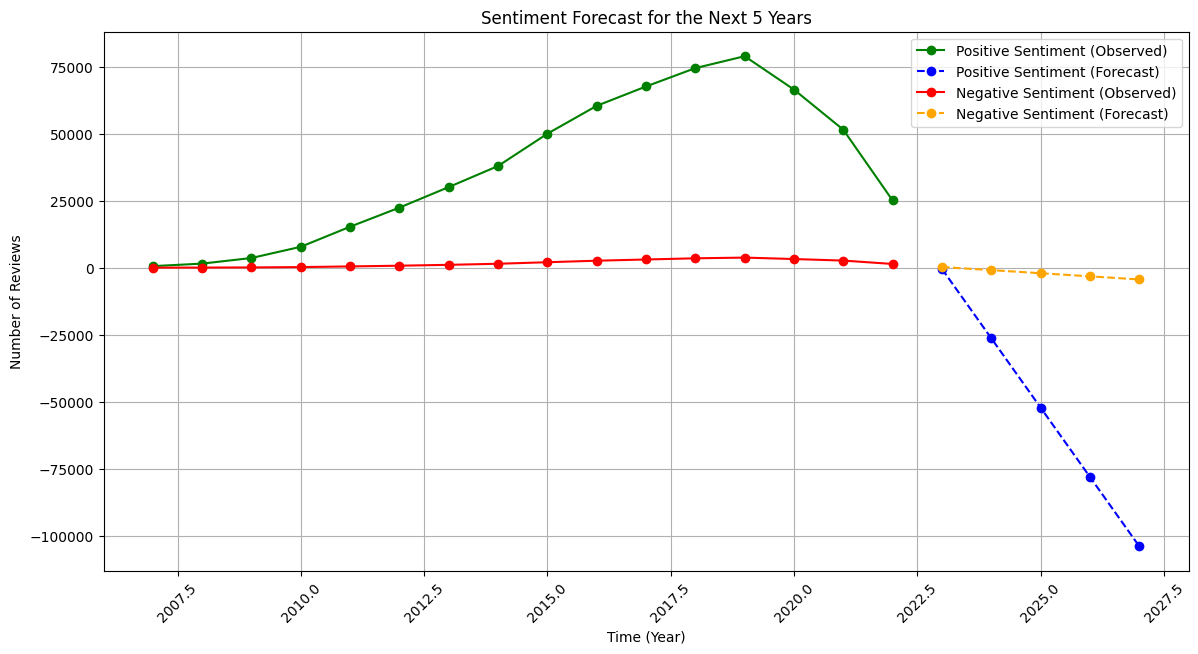

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Exponential Smoothing model for positive sentiment
positive_model = ExponentialSmoothing(yearly_data['positive_smoothed'].dropna(), trend='add', seasonal=None).fit()
print("Positive Sentiment Model Summary")
print(positive_model.summary())

# Fit Exponential Smoothing model for negative sentiment
negative_model = ExponentialSmoothing(yearly_data['negative_smoothed'].dropna(), trend='add', seasonal=None).fit()
print("Negative Sentiment Model Summary")
print(negative_model.summary())

# Forecast for the next 5 years for positive sentiment
positive_forecast = positive_model.forecast(steps=5)
print('Positive Sentiment Forecast:', positive_forecast)

# Forecast for the next 5 years for negative sentiment
negative_forecast = negative_model.forecast(steps=5)
print('Negative Sentiment Forecast:', negative_forecast)

# Extend the yearly data to include forecasted years
forecast_years = list(range(yearly_data['year'].max() + 1, yearly_data['year'].max() + 6))
forecast_index = pd.concat([yearly_data['year'], pd.Series(forecast_years)], ignore_index=True)

# Append the forecast to the data
positive_forecast_series = pd.Series(positive_forecast, index=forecast_years)
negative_forecast_series = pd.Series(negative_forecast, index=forecast_years)

# Concatenate the original data with the forecast
positive_extended = pd.concat([yearly_data['positive_smoothed'], positive_forecast_series])
negative_extended = pd.concat([yearly_data['negative_smoothed'], negative_forecast_series])

# Plot the forecasts
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['year'], yearly_data['positive_smoothed'], label='Positive Sentiment (Observed)', color='green', marker='o')
plt.plot(forecast_years, positive_forecast, label='Positive Sentiment (Forecast)', color='blue', linestyle='dashed', marker='o')
plt.plot(yearly_data['year'], yearly_data['negative_smoothed'], label='Negative Sentiment (Observed)', color='red', marker='o')
plt.plot(forecast_years, negative_forecast, label='Negative Sentiment (Forecast)', color='orange', linestyle='dashed', marker='o')
plt.title('Sentiment Forecast for the Next 5 Years')
plt.xlabel('Time (Year)')
plt.ylabel('Number of Reviews')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Positive Sentiment Model Summary

| Parameter           | Value        | Description                                                                 | Analysis                                                                 |
|---------------------|--------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------|
| SSE                 | 735,809,668.559 | Sum of Squared Errors, a measure of the model's prediction accuracy.         | A higher value indicates larger deviations from the actual values, suggesting the model may not be fitting the data perfectly. |
| AIC                 | 290.302      | Akaike Information Criterion, a measure of the model's quality with a penalty for complexity. | Lower AIC suggests a better model fit, but this value is relatively high, indicating room for improvement. |
| BIC                 | 293.393      | Bayesian Information Criterion, similar to AIC but with a different penalty for complexity. | BIC is close to AIC, reinforcing that the model is relatively complex.   |
| AICC                | 299.636      | Corrected Akaike Information Criterion, adjusted for small sample sizes.     | The higher AICC reflects small sample size correction, hinting at overfitting risk. |
| smoothing_level (α) | 0.9714286    | Smoothing parameter for the level component.                                 | A value close to 1 indicates the model heavily weights recent observations. |
| smoothing_trend (β) | 0.9714286    | Smoothing parameter for the trend component.                                 | Similar to α, a value close to 1 shows a strong reliance on recent data for trend estimation. |
| initial_level       | -14,462.978  | Initial value for the level component.                                       | The negative initial level is unusual and might indicate data issues or model mis-specification. |
| initial_trend       | 6,802.0505   | Initial value for the trend component.                                       | A positive initial trend suggests the sentiment was increasing at the start of the period. |

### Negative Sentiment Model Summary

| Parameter           | Value        | Description                                                                 | Analysis                                                                 |
|---------------------|--------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------|
| SSE                 | 1,407,855.976  | Sum of Squared Errors, a measure of the model's prediction accuracy.         | Lower than the positive sentiment SSE, suggesting a better fit for negative sentiment. |
| AIC                 | 190.160      | Akaike Information Criterion, a measure of the model's quality with a penalty for complexity. | Lower AIC indicates a better fit compared to the positive sentiment model. |
| BIC                 | 193.250      | Bayesian Information Criterion, similar to AIC but with a different penalty for complexity. | Close to AIC, confirming model quality and complexity balance.           |
| AICC                | 199.493      | Corrected Akaike Information Criterion, adjusted for small sample sizes.     | Similar to AIC and BIC, indicating a well-fitted model despite small sample size. |
| smoothing_level (α) | 0.9742863    | Smoothing parameter for the level component.                                 | Close to 1, showing high importance of recent data in level smoothing.   |
| smoothing_trend (β) | 0.8768368    | Smoothing parameter for the trend component.                                 | Slightly lower than α, suggesting the trend is smoothed a bit less aggressively. |
| initial_level       | -250.69601   | Initial value for the level component.                                       | Negative value might need investigation, similar to positive sentiment initial level. |
| initial_trend       | 437.92313    | Initial value for the trend component.                                       | Positive initial trend indicates an increasing negative sentiment initially. |

==========================================

### Positive Sentiment Forecast

| Year | Forecast Value  | Analysis                                                           |
|------|-----------------|--------------------------------------------------------------------|
| 2023 | -456.131262     | The negative forecast value indicates a potential model issue.     |
| 2024 | -26,300.715301  | Increasingly negative values suggest the model may not be reliable.|
| 2025 | -52,145.299340  | Consistent negative trend continues, warranting further review.    |
| 2026 | -77,989.883379  | Large negative values likely reflect model or data mis-specification.|
| 2027 | -103,834.467418 | Forecast becomes more unrealistic, indicating poor model fit.      |

### Negative Sentiment Forecast

| Year | Forecast Value  | Analysis                                                           |
|------|-----------------|--------------------------------------------------------------------|
| 2023 | 254.617758      | Positive value indicates a slight increase in negative sentiment.  |
| 2024 | -903.985971     | A sudden drop suggests potential instability in the forecast.      |
| 2025 | -2,062.589700   | Continued negative trend may need model refinement.                |
| 2026 | -3,221.193429   | Increasing negative values reflect a decreasing negative sentiment trend.|
| 2027 | -4,379.797158   | Consistent negative forecast suggests diminishing negative reviews. |


From the graph presented above and the values obtained with the Exponential Smoothing model, we can take the following conclusions:

- Regarding the positive reviews, for the next 5 years, we can easily identify a major drop in the number of positive sentiments in the reviews left by the users, even reaching negative values (?). The justification for this can be due to the Pandemic, a period where, as we have stated before, lead to a decrease in the number of reviews. As a consequence of this disruption, it has lead to a pessimistic forecast for positive sentiments in the next 5 years. This shows the possible limitations or overfitting issues of the model in question. Therefore, to combat this, we can fine-tune the parameters of the model or even use a more appropriate model, like SARIMA, in order to obtain a more reliable result.

- In the case of negative reviews, the forecasts seem more stable and realistic, when compared to the positive sentiment reviews. However, they still show a slight decline, even achieving negative values.

#### Exponential Smoothing - Model Evaluation

In [16]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate evaluation metrics for positive sentiment model
mae_positive = mean_absolute_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues)
mse_positive = mean_squared_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues)
rmse_positive = mean_squared_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues, squared=False)
mape_positive = mean_absolute_percentage_error(yearly_data['positive_smoothed'].dropna(), positive_model.fittedvalues)

print(f'MAE (Positive Sentiment): {mae_positive}')
print(f'MSE (Positive Sentiment): {mse_positive}')
print(f'RMSE (Positive Sentiment): {rmse_positive}')
print(f'MAPE (Positive Sentiment): {mape_positive}')
print(f'AIC (Positive Sentiment): {positive_model.aic}')
print(f'BIC (Positive Sentiment): {positive_model.bic}')

print("\n========================================\n")

# Calculate evaluation metrics for negative sentiment model
mae_negative = mean_absolute_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues)
mse_negative = mean_squared_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues)
rmse_negative = mean_squared_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues, squared=False)
mape_negative = mean_absolute_percentage_error(yearly_data['negative_smoothed'].dropna(), negative_model.fittedvalues)

print(f'MAE (Negative Sentiment): {mae_negative}')
print(f'MSE (Negative Sentiment): {mse_negative}')
print(f'RMSE (Negative Sentiment): {rmse_negative}')
print(f'MAPE (Negative Sentiment): {mape_negative}')
print(f'AIC (Negative Sentiment): {negative_model.aic}')
print(f'BIC (Negative Sentiment): {negative_model.bic}')

MAE (Positive Sentiment): 4546.024632310137
MSE (Positive Sentiment): 45988104.284953676
RMSE (Positive Sentiment): 6781.452962673536
MAPE (Positive Sentiment): 153.6061695919756
AIC (Positive Sentiment): 290.3022930961435
BIC (Positive Sentiment): 293.3926479851026


MAE (Negative Sentiment): 192.51360351445413
MSE (Negative Sentiment): 87990.99848418895
RMSE (Negative Sentiment): 296.6327670440151
MAPE (Negative Sentiment): 86.98117354589522
AIC (Negative Sentiment): 190.15983677241553
BIC (Negative Sentiment): 193.25019166137466


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


| Metric Name                | Metric Meaning                                    | Value Obtained   | Interpretation                                                                                   |
|----------------------------|---------------------------------------------------|------------------|---------------------------------------------------------------------------------------------------|
| MAE (Positive Sentiment)   | Mean Absolute Error                               | 4546.02          | The average error in predicting positive sentiment is about 4546 reviews, indicating significant deviation. |
| MAE (Negative Sentiment)   | Mean Absolute Error                               | 192.51           | The average error in predicting negative sentiment is about 193 reviews, indicating lesser deviation compared to positive sentiment. |
| MSE (Positive Sentiment)   | Mean Squared Error                                | 45,988,104.28    | The large MSE value indicates significant errors in predicting positive sentiment due to the squared nature of the metric. |
| MSE (Negative Sentiment)   | Mean Squared Error                                | 87,991.00        | The MSE value indicates significant errors in predicting negative sentiment, though smaller compared to positive sentiment. |
| RMSE (Positive Sentiment)  | Root Mean Squared Error                           | 6781.45          | The RMSE indicates substantial deviations from actual values, suggesting the model struggles to predict positive sentiment accurately. |
| RMSE (Negative Sentiment)  | Root Mean Squared Error                           | 296.63           | The RMSE indicates considerable deviations, though smaller compared to positive sentiment. |
| MAPE (Positive Sentiment)  | Mean Absolute Percentage Error                    | 153.61%          | The very high percentage error suggests the model's predictions for positive sentiment are unreliable. |
| MAPE (Negative Sentiment)  | Mean Absolute Percentage Error                    | 86.98%           | The high percentage error suggests the model's predictions for negative sentiment are unreliable. |
| AIC (Positive Sentiment)   | Akaike Information Criterion                      | 290.30           | Indicates the relative quality of the model for positive sentiment. Best used for comparison. |
| AIC (Negative Sentiment)   | Akaike Information Criterion                      | 190.16           | Indicates a relatively better fit compared to the positive sentiment model. Best used for comparison. |
| BIC (Positive Sentiment)   | Bayesian Information Criterion                    | 293.39           | Similar to AIC but with an additional penalty for the number of parameters. |
| BIC (Negative Sentiment)   | Bayesian Information Criterion                    | 193.25           | Indicates the relative quality of the model considering the number of parameters. |


Once again, when analyzing the obtained results, we can easily see that the quite high values obtained, especially for the positive sentiments, for each metric in question, suggest that the Exponential Smoothing model isn't the most adequate to forecast Yelp Reviews. It's also important to note that, even though, when compared to results in the ARIMA model, these values are lower, which is a good sign, from the graph previously obtained, we can see that these predictions shouldn't be considered as reliable results, as it's forecasted that the number of reviews (most notably positive reviews) will significantly drop.

With this in consideration, we can afirm the poor performance of the model. In our opinion, as we have seen before, it can be due to the covid period, which will greatly affect the results.

#### Parameter Tuning

One way to improve this model can be, for example, performing parameter tuning to find the optimal smoothing levels for level (alpha), trend (beta), and potentially seasonal (gamma) components. For this task, we've decided to use a grid search, in order to test different combinations of these parameters.

In [25]:
from itertools import product

# Define the parameter grid
alphas = np.linspace(0.01, 1.0, 10)
betas = np.linspace(0.01, 1.0, 10)
gammas = [0.0]  # No seasonality

best_model = None
best_score = np.inf
best_params = (None, None)

# Perform grid search
for alpha, beta in product(alphas, betas):
    model = ExponentialSmoothing(yearly_data['positive_smoothed'].dropna(), trend='add')
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, optimized=False)
    
    # Evaluate the model using AIC
    score = fitted_model.aic
    
    # Update the best model if the current one is better
    if score < best_score:
        best_model = fitted_model
        best_score = score
        best_params = (alpha, beta)

# Print the best parameters and the corresponding AIC score
print("Best Parameters:")
print(f"Alpha: {best_params[0]}, Beta: {best_params[1]}")
print(f"AIC: {best_score}")

Best Parameters:
Alpha: 1.0, Beta: 1.0
AIC: 290.42012311217405


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.frame

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


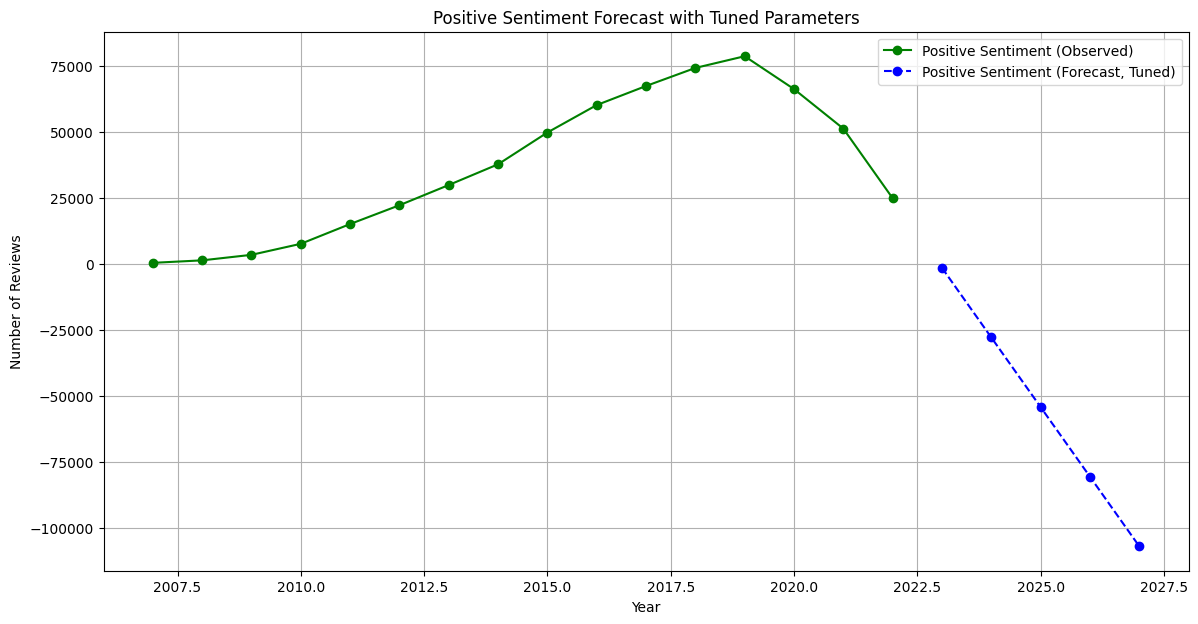

In [26]:
# Forecast using the best model
forecast_years = list(range(yearly_data['year'].max() + 1, yearly_data['year'].max() + 6))
positive_forecast_tuned = best_model.forecast(steps=5)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['year'], yearly_data['positive_smoothed'], label='Positive Sentiment (Observed)', color='green', marker='o')
plt.plot(forecast_years, positive_forecast_tuned, label='Positive Sentiment (Forecast, Tuned)', color='blue', linestyle='dashed', marker='o')
plt.title('Positive Sentiment Forecast with Tuned Parameters')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can see that, even with parameter tuning, the results don't represent a realistic and accurate forecast of, in this case, positive reviews for the next 5 years. 